In [1]:
pip install pandas numpy statsmodels matplotlib pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [58]:
import pandas as pd
import numpy as np


df = pd.read_excel (r'/Users/ayaoji/Desktop/Summer Assignment 2021/japan-data.xlsx', index_col = 'Date', parse_dates =True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df



Shape of data (19, 2)


,GDP_capita,GDP
Date,,
2000-01-01,38532.0415,3466.702
2001-01-01,33846.4524,3495.563
2002-01-01,32289.3456,3638.031
2003-01-01,34808.4017,3765.294
2004-01-01,37688.8724,3922.305
2005-01-01,37217.6448,4126.456
2006-01-01,35433.9854,4308.202
2007-01-01,35275.2197,4455.119
2008-01-01,39339.2999,4377.987


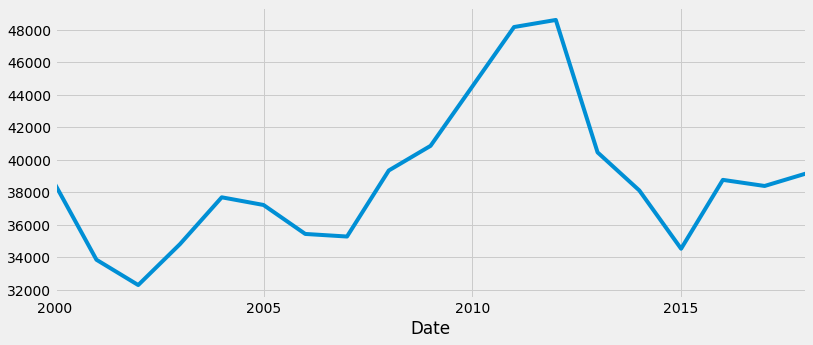

In [59]:
df['GDP_capita'].plot(figsize=(12,5))

Cheking for stationarity

In [60]:
from statsmodels.tsa.stattools import adfuller

In [61]:

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)


In [62]:
ad_test(df['GDP_capita'])

## how to intupret test 
## p value smaller the better (means it is stationary)
## p > 0.05 so not stationary 


1. ADF :  -2.4235920587406192
2. P-Value :  0.1351881306541063
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 16
5. Critical Values :
	 1% :  -3.9240193847656246
	 5% :  -3.0684982031250003
	 10% :  -2.67389265625


ARIMA MODEL 

In [63]:
from pmdarima import auto_arima
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


In [64]:
stepwise_fit = auto_arima(df['GDP_capita'], trace=True,
                            suppress_warnings=True)

stepwise_fit.summary()
# goal is to minimize the AIC 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=364.030, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=375.938, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=364.344, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=367.391, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=457.604, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=362.126, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=361.231, Time=0.04 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=362.416, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=364.346, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=447.521, Time=0.02 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.686 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -176.615
Date:                Mon, 27 Sep 2021   AIC                            361.231
Time:                        14:55:37   BIC                            365.009
Sample:                             0   HQIC                           361.870
                                 - 19                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.972e+04   1871.378     21.226      0.000    3.61e+04    4.34e+04
ma.L1          0.9825      0.317      3.103      0.002       0.362       1.603
ma.L2          0.6608      0.471      1.404      0.160      -0.262       1.583
sigma2      7.449e+06   3.58e+06      2.083      0.037    4.41e+05    1.45e+07
===================================================================================
Ljung-Box (Q):                        8.83   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.96   Prob(JB):                         0.80
Heteroskedasticity (H):               1.32   Skew:                             0.31
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Split the data and test the model 

In [65]:
from statsmodels.tsa.arima_model import ARIMA

In [66]:
print(df.shape)
train=df.iloc[:-4]
test=df.iloc[-4:]
print(train.shape,test.shape)

(19, 2)
(15, 2) (4, 2)


In [67]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['GDP_capita'],order=(0,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.GDP_capita   No. Observations:                   14
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -132.163
Method:                       css-mle   S.D. of innovations           3004.646
Date:                Mon, 27 Sep 2021   AIC                            272.326
Time:                        14:55:46   BIC                            274.883
Sample:                    01-01-2001   HQIC                           272.090
                         - 01-01-2014                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -172.1949   1374.704     -0.125      0.900   -2866.566    2522.176
ma.L1.D.GDP_capita     0.6091      0.537      1.134      0.257      -0.444       1.662
ma.L2.D.GDP_capita     0.1538      0.547      0.281      0.779      -0.918       1.226
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.9800           -1.6067j            2.5498           -0.3915
MA.2           -1.9800           +1.6067j            2.5498            0.3915
-----------------------------------------------------------------------------
"""

Make prediction on Test Set 

In [68]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)


2015-01-01    38364.185366
2016-01-01    38596.209599
2017-01-01    38424.014691
2018-01-01    38251.819784
Freq: AS-JAN, Name: ARIMA Predictions, dtype: float64


In [69]:
test['GDP_capita'].mean()

37708.055700000004

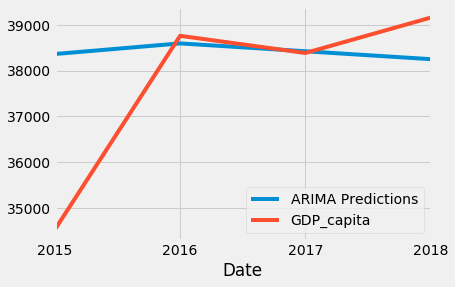

In [70]:
pred.plot(legend=True)
test['GDP_capita'].plot(legend=True)

In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['GDP_capita'].mean()
rmse=sqrt(mean_squared_error(pred,test['GDP_capita']))
print(rmse)

1974.5880756206823


In [31]:
#it is a bad model if the mean of the data set is similar to the mean of the prediction

Apply the model to the entire data set and predict the future 

In [72]:
model2=ARIMA(df['GDP_capita'],order=(0,1,2))
model2=model2.fit()
df.tail()

,GDP_capita,GDP
Date,,
2014-01-01,38109.4121,5001.044
2015-01-01,34524.4699,5155.384
2016-01-01,38761.8182,5244.116
2017-01-01,38386.5111,5385.336
2018-01-01,39159.4236,5543.976


In [73]:
index_future_dates=pd.date_range(start='2018-01-01',end='2020-01-01', freq="Y")
print(index_future_dates)

DatetimeIndex(['2018-12-31', '2019-12-31'], dtype='datetime64[ns]', freq='A-DEC')


In [74]:
pred=model2.predict(start=len(df),end=len(df)+1,typ='levels').rename('ARIMA Predictions')

#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-31    38308.115610
2019-12-31    38073.787519
Freq: A-DEC, Name: ARIMA Predictions, dtype: float64
